In [1]:
import pandas as pd
from datasets import load_dataset
import ast
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

🟩 Data Scientist Hourly Salary Box Plot (2.18.1) - Problem
Matplotlib Box Plots
Problem Statement:

Create a box plot to visualize the distribution of salary_hour_avg for Data Scientist job postings in the United States. Label the x-axis as 'Data Scientist' and the y-axis as 'Hourly Salary ($USD)'.
Hint:

Use the DataFrames plot() method to create the box plot. Customize the x-axis and y-axis labels using plt.xlabel() and plt.ylabel().

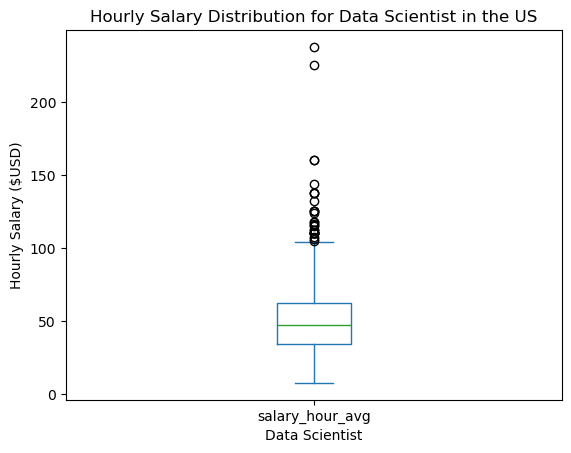

In [8]:
df_DS = df[(df['job_title_short']=='Data Scientist') & (df['job_country']=='United States')]

df_DS['salary_hour_avg'].plot(kind='box')

plt.xlabel('Data Scientist')
plt.ylabel('Hourly Salary ($USD)')
plt.title('Hourly Salary Distribution for Data Scientist in the US')
plt.show()

🟨 Comparison of Hourly Salaries for Data Analyst (2.18.2) - Problem
Matplotlib Box Plots
Problem Statement:

Create a box plot to compare the distribution of salary_hour_avg for Data Analyst job postings in the United States and Canada.

    Filter a DataFrame to include only 'Data Analyst' roles in these two countries.
    Use list comprehension to create a list of DataFrames for each country.
    Use the plt.boxplot() function to plot this list and specify the labels as countries.
    Set the y-axis limit to 150 and the y-axis as 'Hourly Salary ($USD)'.

Code Needed:

countries = ['United States', 'Canada']

Hint:

Use the plt.boxplot() function to create the box plot and customize the y-axis labels using  plt.ylabel().

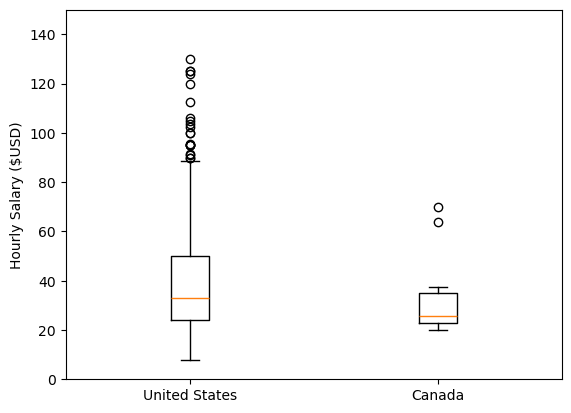

In [32]:
countries = ['United States', 'Canada']

df_DS = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'].isin(countries))]

df_DS_US_C=[
    df_DS[df_DS['job_country']== c]['salary_hour_avg'].dropna()
    for c in countries
]


plt.boxplot(df_DS_US_C, tick_labels=countries)
plt.ylim(0,150)
plt.ylabel('Hourly Salary ($USD)')
plt.show()


🟥 Comparison of Hourly Salaries in Canada (2.18.3) - Problem
Matplotlib Box Plots
Problem Statement:

    Create a box plot to compare the distribution of salary_hour_avg for Data Analyst, Data Engineer, and Data Scientist job postings in Canada.
    Label the x-axis as 'Job Title' and format the y-axis to have '$' before the number then label it as 'Hourly Salary (USD)'.

Code Needed:

job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

Hint:

    Create a box plot using ax.boxplot() after setting up your figure and axes with plt.subplots().
    Customize the x-axis and y-axis labels using ax.set_xlabel() and ax.set_ylabel().
    Apply a custom formatter to the y-axis to format salary values as currency.


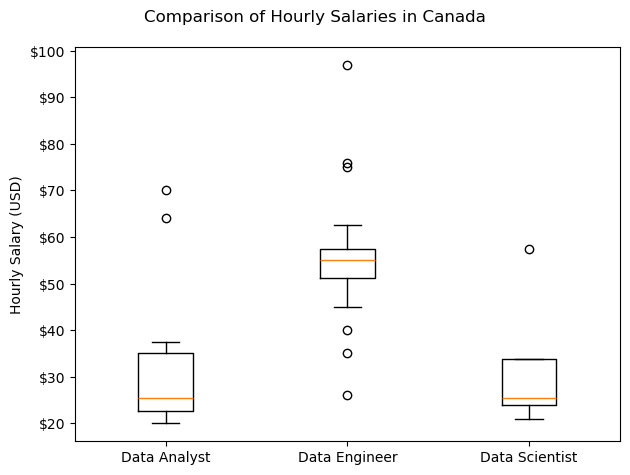

In [65]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_data_jobs = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'Canada')].dropna(subset='salary_hour_avg')

fig, ax = plt.subplots()
data_jobs = [df_data_jobs[df_data_jobs['job_title_short']==job]['salary_hour_avg'] for job in job_titles]
ax.boxplot(data_jobs,tick_labels=job_titles)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x)}'))
ax.set_ylabel('Hourly Salary (USD)')

fig.suptitle('Comparison of Hourly Salaries in Canada')
fig.tight_layout()
plt.show()